Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to
understand the distribution and relationships between the variables.

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   

KeyboardInterrupt: 

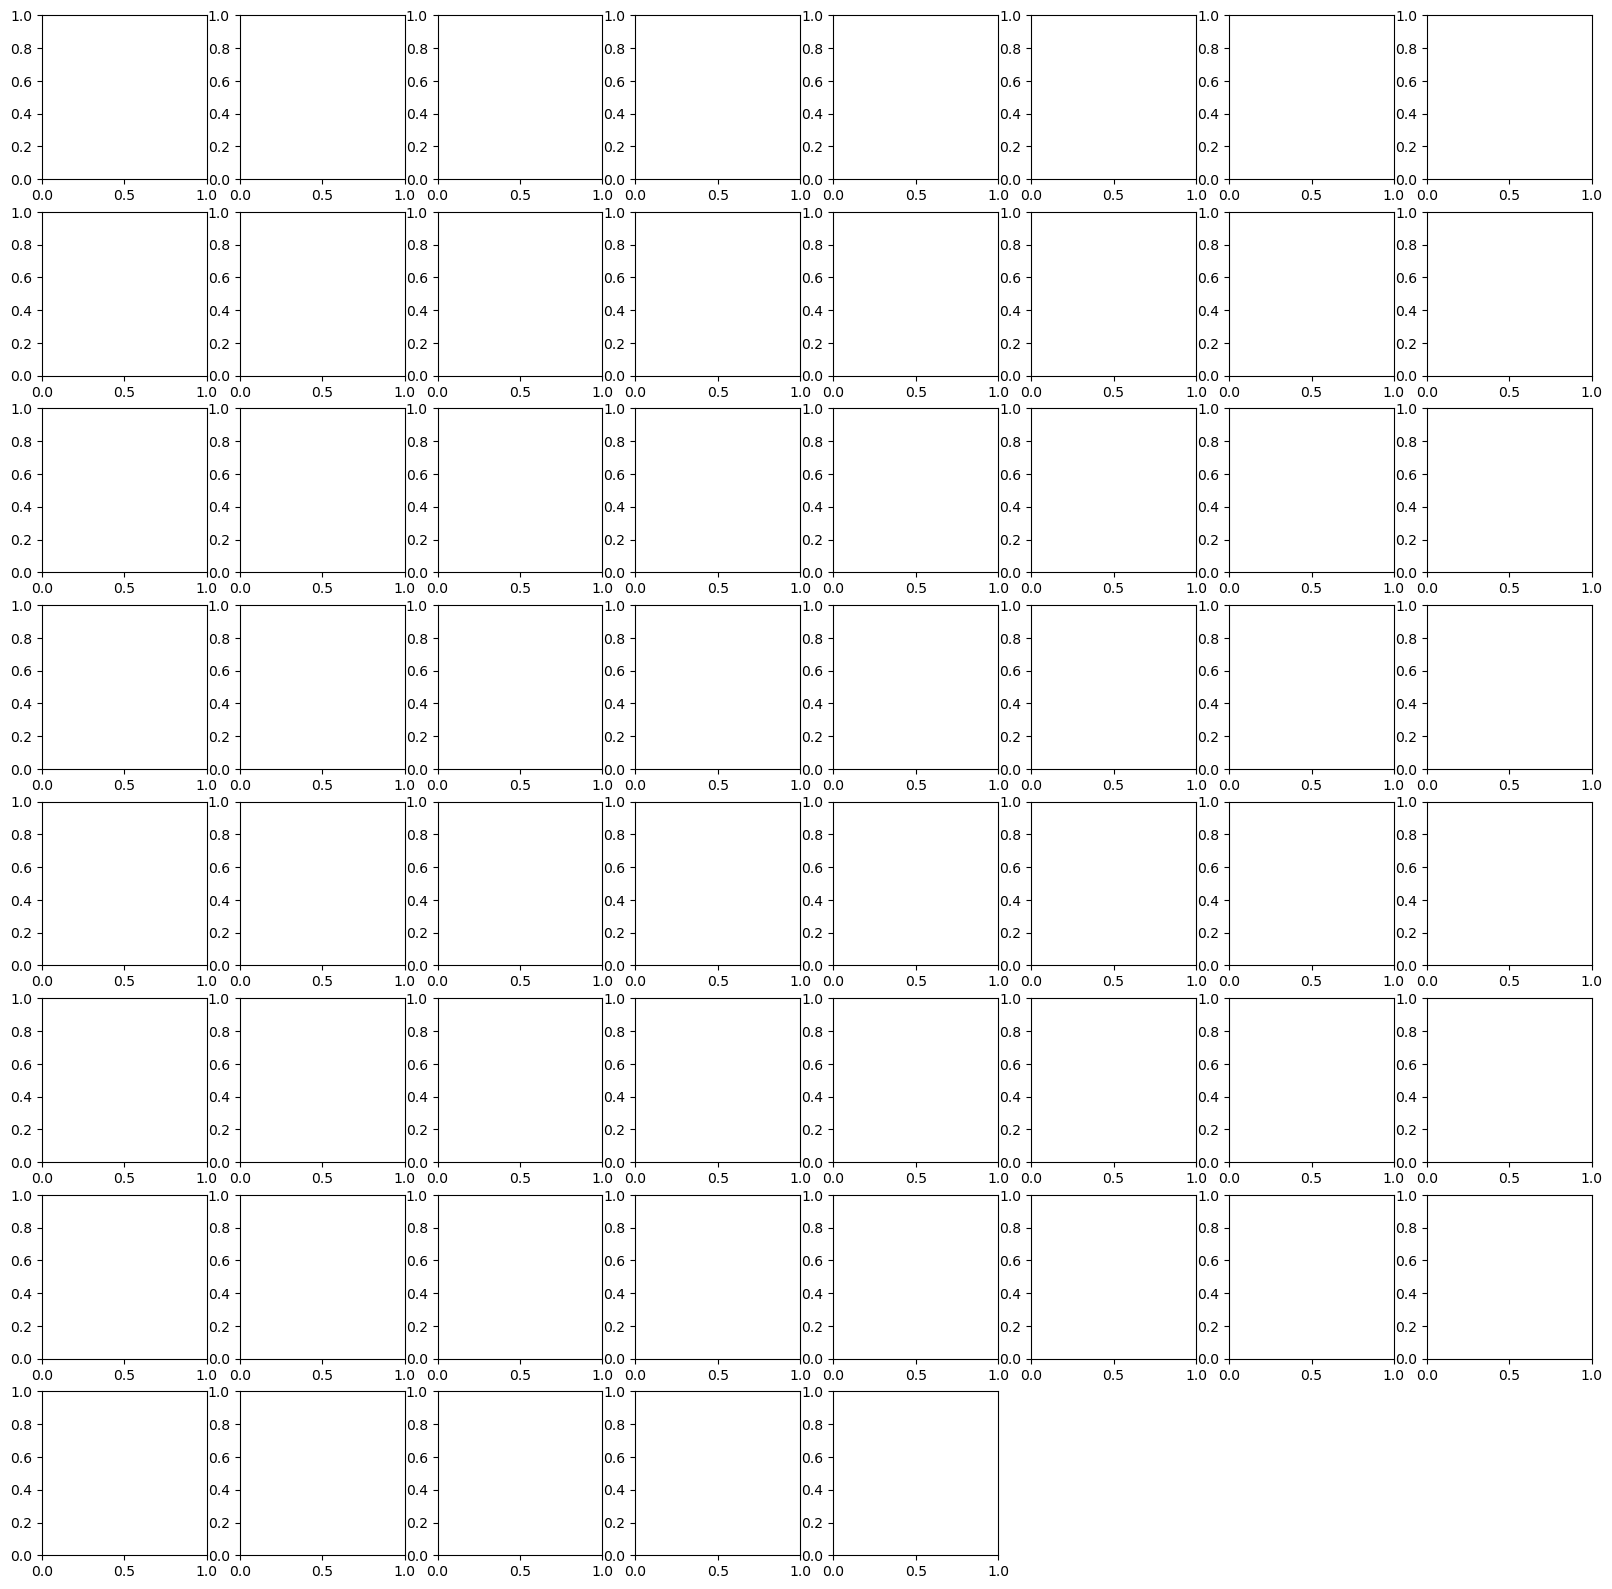

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the dataset
data = pd.read_csv('diabetes.csv')

# Display the first few rows of the dataset
print(data.head())

# Display descriptive statistics of the dataset
print(data.describe())

# Display the data types of each variable
print(data.dtypes)

# Visualize the distribution of the variables
sns.pairplot(data, hue='Outcome', diag_kind='hist')
plt.show()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical
variables into dummy variables if necessary.

In [2]:
# Handle missing values
data['Glucose'].fillna(data['Glucose'].mean(), inplace=True)
data['BloodPressure'].fillna(data['BloodPressure'].mean(), inplace=True)
data['SkinThickness'].fillna(data['SkinThickness'].median(), inplace=True)
data['Insulin'].fillna(data['Insulin'].median(), inplace=True)
data['BMI'].fillna(data['BMI'].median(), inplace=True)

# Remove outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Transform categorical variables (if any)
# Assuming there are no categorical variables in this dataset

# Display the first few rows of the cleaned dataset
print(data.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
5            5      116             74              0        0  25.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
5                     0.201   30        0  


Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [3]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data into training and testing sets with a random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (511, 8) (511,)
Testing set shape: (128, 8) (128,)


Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use
cross-validation to optimize the hyperparameters and avoid overfitting.

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=StratifiedKFold(n_splits=5), verbose=1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best hyperparameters to train the decision tree classifier
best_dt_classifier = DecisionTreeClassifier(**best_params, random_state=42)
best_dt_classifier.fit(X_train, y_train)


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, random_state=42)

Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,
precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

Accuracy: 0.765625
Precision: 0.6666666666666666
Recall: 0.3333333333333333
F1 Score: 0.4444444444444444


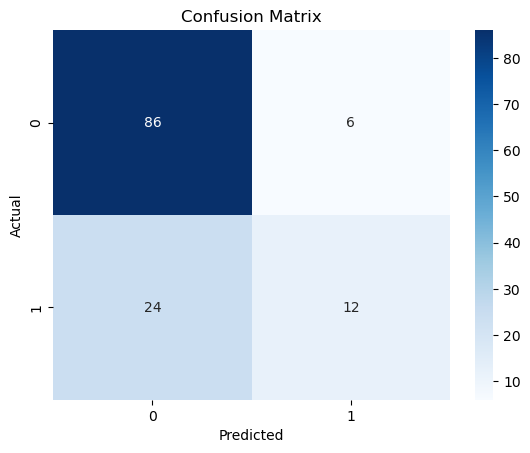

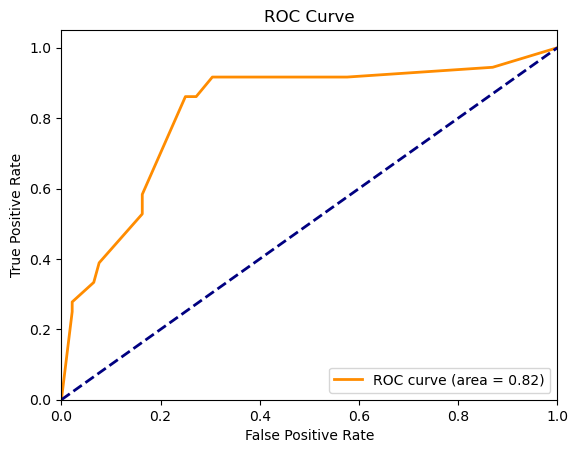

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = best_dt_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC curve
y_prob = best_dt_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important
variables and their thresholds. Use domain knowledge and common sense to explain the patterns and
trends.

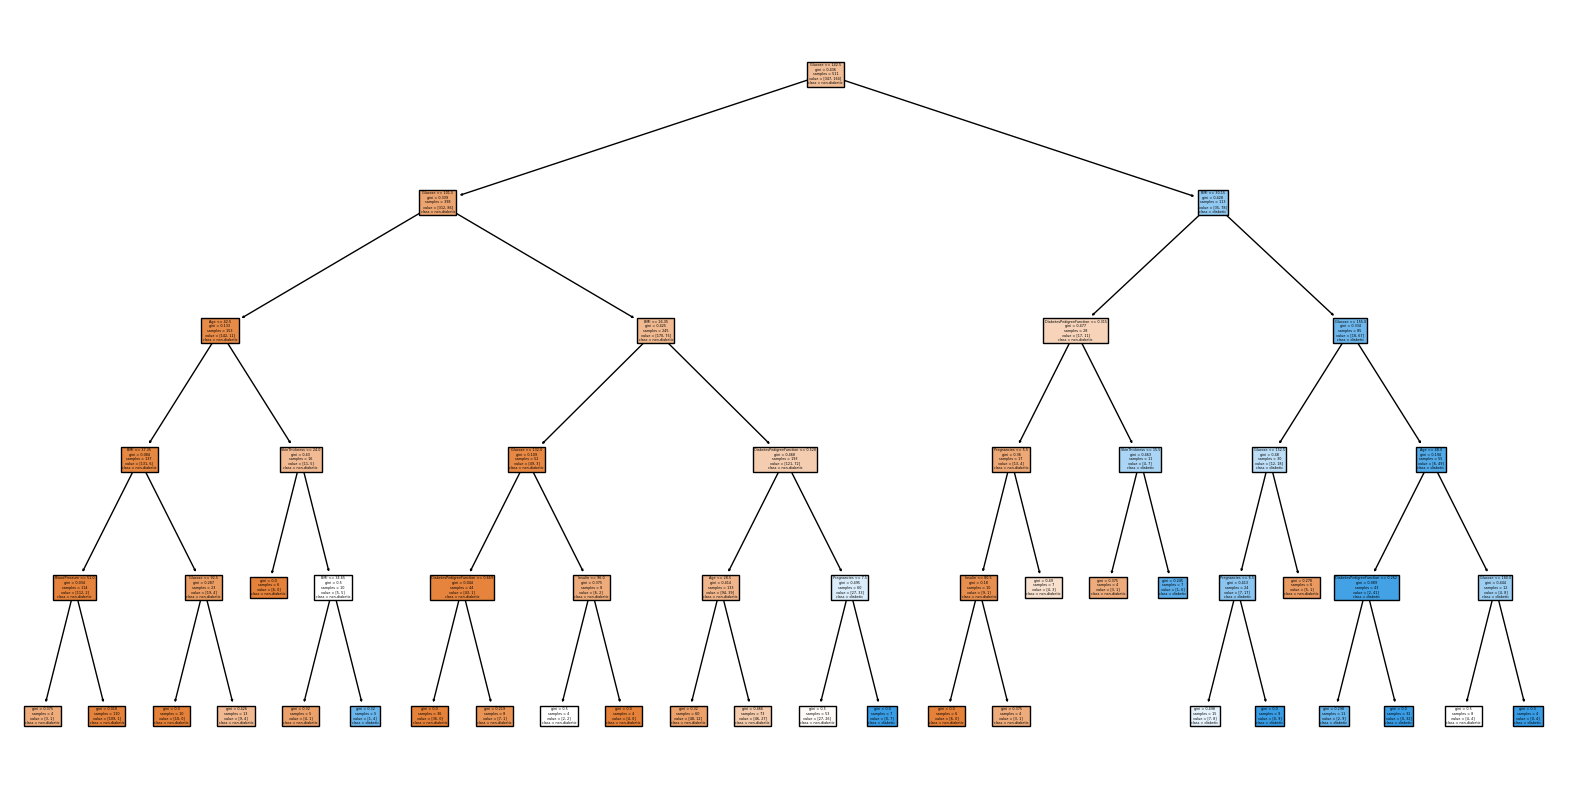

In [6]:
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(best_dt_classifier, feature_names=X.columns, class_names=['non-diabetic', 'diabetic'], filled=True)
plt.show()


Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the
dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and
risks.

Validating a decision tree model involves testing its performance on new data or evaluating its robustness to changes in the dataset or environment. Sensitivity analysis and scenario testing can help explore the uncertainty and risks associated with the model. Here's how you can approach this:

1. **Applying the model to new data**: Use the trained decision tree model to make predictions on a separate dataset (not used for training or testing). This will help evaluate how well the model generalizes to unseen data.

2. **Testing robustness to changes**: Make small changes to the dataset or environment and observe how the model's performance is affected. For example, you can introduce noise to the data, remove outliers, or change the distribution of the variables.

3. **Sensitivity analysis**: Conduct sensitivity analysis to determine how changes in input variables affect the model's predictions. This can help identify variables that have the most impact on the model's output and assess the model's stability.

4. **Scenario testing**: Test the model under different scenarios or conditions to understand its behavior in various situations. This can help uncover potential limitations or biases in the model.

By validating the decision tree model in these ways, you can gain insights into its performance, robustness, and potential areas for improvement.